# TP2: Analyse factorielle des correspondances

## Najlaa Srifi_____ Hajar El fahfouhi_____Léa Bagheri 

Le but de ce TP est de mettre en place l'analyse factorielle des correspondances avec toutes ces différentes étapes. Ainsi d'assimiler les bases de la transformation utilisée en AFC

## Partie 1: AFC 

Pour cela, on commence d’abord par importer le fichier de données .csv, on ne retient que les colonnes « Sexe » et « Fonction » qui feront l’objet de cette étude, et ensuite on procède à la construction de la matrice de contingence.

In [ ]:
import numpy as np
import pandas as pd 
import random
import math
import copy as cp

import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Question1: 

On visualise notre base de données qui issue d'une enquête réalisée lors d'un sondage dans une entreprise sur la perception du travail réalisé

In [ ]:
dataAFC = pd.read_excel('TP_AFC_majeur1718_travail.xlsx')
dataAFC

,id,Sexe,Fonction,temps travail,Qualite vie
0,1,0,4,16.0,4.0
1,2,1,3,2.0,16.0
2,3,2,3,16.0,4.0
3,4,1,3,4.0,4.0
4,5,1,2,2.0,4.0
...,...,...,...,...,...
246,247,2,3,2.0,4.0
247,248,2,6,2.0,99.0
248,,,,NaN,NaN
249,,NaN,NaN,NaN,NaN


In [ ]:
dataAFC.describe()

,temps travail,Qualite vie
count,248.000000,248.000000
mean,17.967742,20.866935
std,28.489485,32.217166
min,2.000000,2.000000
25%,2.000000,4.000000
50%,8.000000,4.000000
75%,16.000000,16.000000
max,99.000000,99.000000


In [ ]:
dataAFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              251 non-null    object 
 1   Sexe            249 non-null    object 
 2   Fonction        249 non-null    object 
 3    temps travail  248 non-null    float64
 4   Qualite vie     248 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.9+ KB


On remarque que dans plusieur lignes,il exist des valeurs NAN. Pour cette raison on utilise la fonction dropana pour supprimer ces lignes

In [ ]:
#alteration
dataAFC = dataAFC.dropna()
dataAFC=dataAFC[:-1]
dataAFC["Sexe"] = pd.to_numeric(dataAFC["Sexe"])
dataAFC["Fonction"] = pd.to_numeric(dataAFC["Fonction"])

In [ ]:
dataAFC

,id,Sexe,Fonction,temps travail,Qualite vie
0,1,0,4,16.0,4.0
1,2,1,3,2.0,16.0
2,3,2,3,16.0,4.0
3,4,1,3,4.0,4.0
4,5,1,2,2.0,4.0
...,...,...,...,...,...
242,243,2,1,2.0,4.0
243,244,2,3,16.0,4.0
244,245,1,4,16.0,4.0
245,246,1,1,2.0,4.0


On a choisit de travailler avec les deux variables sexe et fonction et du coup notre analyse concernera l'adéquation entre modalité de sexe et le travail à réaliser

In [ ]:
dataAFC = dataAFC[["Sexe", "Fonction"]]
dataAFC.head()

,Sexe,Fonction
0,0,4
1,1,3
2,2,3
3,1,3
4,1,2


#### Matrice de  contingence

AFC permet d’étuder un lien entre différentes modalités de chaque vari-
able. Pour cela nous il vaut mieux travailler en terme de proportion.La première étape consiste à calculer la somme des effectifs du tableau de données
puis diviser la matrice des effectifs par ce grand total.

On a les deux variables (sexe, Fonction) observées simultanément sur 247 indvidus. La première variable possède 3 modalités et la seconde possède 8 modalités (3*8=24 )

In [ ]:
n = np.max(dataAFC["Sexe"]) + 1
p = np.max(dataAFC["Fonction"]) + 1
M_contingence = np.zeros((n, p))
for i in range(0, dataAFC.shape[0]):
    M_contingence[(dataAFC["Sexe"][i], dataAFC["Fonction"][i])] += 1
MC=pd.DataFrame(M_contingence)
MC

,0,1,2,3,4,5,6,7
0,8.0,0.0,3.0,7.0,3.0,0.0,0.0,4.0
1,0.0,15.0,24.0,48.0,13.0,6.0,12.0,4.0
2,0.0,57.0,9.0,18.0,7.0,1.0,5.0,3.0


#### Matrice de fréquence

In [ ]:
M_freq=MC/dataAFC.shape[0]
M_freq

,0,1,2,3,4,5,6,7
0,0.032389,0.000000,0.012146,0.028340,0.012146,0.000000,0.000000,0.016194
1,0.000000,0.060729,0.097166,0.194332,0.052632,0.024291,0.048583,0.016194
2,0.000000,0.230769,0.036437,0.072874,0.028340,0.004049,0.020243,0.012146


chaque cellule nous montre la  proportion de l'ensemble de notre matrice que représente chaque modalité de la collone Sexe et Fonction  sur la base de tous nos données.

#### Expected_matrice

In [ ]:
from scipy.stats.contingency import expected_freq
# Sous hypotèse d indipendance entre les le sexe et la fonction c'est quoi la Matrice de distribution 
expected_matrice=expected_freq(MC)
expected_matrice

array([[ 0.8097166 ,  7.28744939,  3.6437247 ,  7.38866397,  2.32793522,
         0.70850202,  1.72064777,  1.11336032],
       [ 3.951417  , 35.56275304, 17.78137652, 36.05668016, 11.36032389,
         3.45748988,  8.39676113,  5.43319838],
       [ 3.2388664 , 29.14979757, 14.57489879, 29.55465587,  9.31174089,
         2.8340081 ,  6.88259109,  4.4534413 ]])

Analyser les relation les relations entre variables et modalités revient à constater un écart a une situation d’uniformité. Cette situation d’unifromité (cas
d’indépendance des variables) est exprimée par la matrice d’indépendance
qui se calcul simplement avec le produit de la somme marginale des lignes
(vecteur colonne) par la somme marginale de colonnes (vecteur ligne).

On calcule la matrice de distribution des correspondances si les deux variables qualitatives sont indépendantes pour avoir une première idée sur le niveau de corrélation de ces deux dernières. On calcule ensuite la matrice R = T – T0 (vue en cours) des écarts entre les données de la matrice de contingence et la matrice de contingence sous hypothèse d'indépendance. On obtient la matrice suivante :

In [ ]:
# on calcule Ecart entre les données de la table de contingence et la table de contingence sous hyp. d’indépendance
R=MC-expected_matrice
R

,0,1,2,3,4,5,6,7
0,7.190283,-7.287449,-0.643725,-0.388664,0.672065,-0.708502,-1.720648,2.886640
1,-3.951417,-20.562753,6.218623,11.943320,1.639676,2.542510,3.603239,-1.433198
2,-3.238866,27.850202,-5.574899,-11.554656,-2.311741,-1.834008,-1.882591,-1.453441


On remarque que tous les cellules sont différentes de zéro --> pas d'indépendance.  Mais il faut vérifier ce propos avec la statistique du  χ2.




###    Test du  χ2 : 


In [ ]:
total = np.sum(np.sum(MC))
freq_ind = pd.DataFrame(expected_matrice / total)
khi = 0
for i in range(3):
   for j in range(n):
    khi += ((MC.loc[i,j] - freq_ind.loc[i,j])**2)/freq_ind.loc[i,j]        
khi *= total
print("La statistique du Khi 2 vaut: " + str(khi))


La statistique du Khi 2 vaut: 14416985.968831966


La statistique du   χ2 vaut : 14416985.968831966
L'intensité de liaison  χ2n  est très élevée, on en conclut qu'on a dépendance.
En plus, la statistique du  χ2 est d'autant plus grande ce qui veut dire que nos fonctions sont très dépendantes.
 
Ensuite, on construit les profils lignes, les profils colonnes ainsi que les matrices Dn et Dp des marges en lignes et en colonnes :


#### Profils lignes 

In [ ]:
ligne_totale= np.sum(M_contingence,axis=1)
pd.DataFrame(ligne_totale)

,0
0,25.0
1,122.0
2,100.0


In [ ]:
profil_lignes = np.apply_along_axis(arr=M_contingence,axis=1,func1d=lambda x:x/np.sum(x)) 
pd.DataFrame(profil_lignes)

,0,1,2,3,4,5,6,7
0,0.32,0.000000,0.120000,0.280000,0.120000,0.00000,0.000000,0.160000
1,0.00,0.122951,0.196721,0.393443,0.106557,0.04918,0.098361,0.032787
2,0.00,0.570000,0.090000,0.180000,0.070000,0.01000,0.050000,0.030000


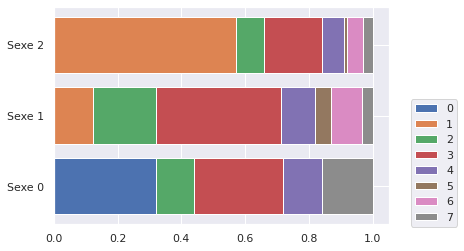

In [ ]:
somme = np.zeros(shape=(profil_lignes.shape[0])) 
for i in range(profil_lignes.shape[1]):
    plt.barh(range(profil_lignes.shape[0]),profil_lignes[:,i],left=somme,label=str(i)) 
    somme = somme + profil_lignes[:,i]
    
    
plt.yticks(range(profil_lignes.shape[0]),['Sexe 0', 'Sexe 1', 'Sexe 2'])
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

ce graphe nous donne une idée sur la proportion de contribution de chaque fonction dans un sexe donné . c'est la fréquence marginale par colonne. On remarque que  pour sexe 2 la fonction 1 est la plus fait par contre pour le sexe 2 la fonction 3 qui prend la grande proportion, et pour le sexe 0les fonctions 0 et 3 sont les plus presente.

#### Profils colonnes 

In [ ]:
colonne_total = np.sum(M_contingence,axis=0)
pd.DataFrame(colonne_total )

,0
0,8.0
1,72.0
2,36.0
3,73.0
4,23.0
5,7.0
6,17.0
7,11.0


In [ ]:
profil_colonne = np.apply_along_axis(arr=M_contingence,axis=0,func1d=lambda x:x/np.sum(x)) 
pd.DataFrame(profil_colonne )

,0,1,2,3,4,5,6,7
0,1.0,0.000000,0.083333,0.095890,0.130435,0.000000,0.000000,0.363636
1,0.0,0.208333,0.666667,0.657534,0.565217,0.857143,0.705882,0.363636
2,0.0,0.791667,0.250000,0.246575,0.304348,0.142857,0.294118,0.272727


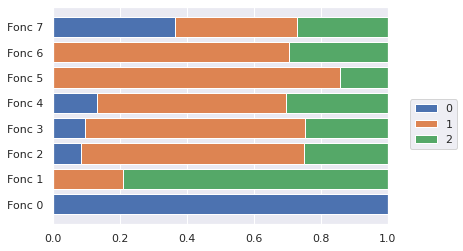

In [ ]:
somme = np.zeros(shape=(profil_colonne.shape[1])) 
for i in range(profil_colonne.shape[0]):
    plt.barh(range(profil_colonne.shape[1]),profil_colonne[i,:],left=somme,label=str(i)) 
    somme = somme + profil_colonne[i,:]
    
plt.yticks(range(profil_colonne.shape[1]),['Fonc 0', 'Fonc 1', 'Fonc 2','Fonc 3', 'Fonc 4', 'Fonc 5','Fonc 6', 'Fonc 7'])
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

ce graphe nous donne une idée sur la proportion de contribution de chaque sexe dans une fonction  donnée . c'est la fréquence marginale par ligne. On remarque que pour plusieur fonction il y a des sexes qui sont majoritairement presents par apport a d'autre, par exemple la fonction 0 qui est totalement corrélé avec le sexe 0.

In [ ]:
n = MC.shape[0]
p = MC.shape[1]

Dn = np.zeros((n,n))
Dp = np.zeros((p,p))


for i in range(n):
    Dn[i][i] = ligne_totale[i]
    
for i in range(p):
    Dp[i][i] = colonne_total[i] 




In [ ]:
Dn 


array([[ 25.,   0.,   0.],
       [  0., 122.,   0.],
       [  0.,   0., 100.]])

In [ ]:
Dp

array([[ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 72.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 36.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 73.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 23.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 17.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]])

Le rôle de l'AFC permettra de mettre en évidence les différences entre les profils et d'identifier les éventuels contacts entre les sexes et les fonctions.

####  Les points en 3D avant transformation 

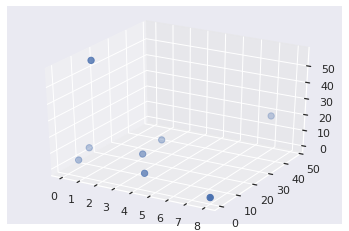

In [ ]:
# On visualise maintenant le nuage des points dans l’espace « Sexe » avant de procéder à la réduction de dimension dans Rp:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.transpose(M_contingence)[:,0],np.transpose(M_contingence)[:,1],np.transpose(M_contingence)[:,2],zdir='z',s=40,depthshade=True)
plt.show()

Quand on approche la surface recouvrant le nuage de points avec une ellipse, on voit que c’est une ellipse bien définie et plate.


La partie d’approximation de la triangulation par une ellipse a été faite sous R, on n’est pas parvenu à bien la coder sous Python.
 
Conclusion : D’après la matrice R des écarts entre les données de la matrice de contingence et la matrice de contingence sous hypothèse d'indépendance, le test du  χ2 et l’approximation du nuage de points par une ellipse, on conclut que la réduction de dimension se fera sans perte d’informations.

## Question2:

la réduction et la projection du nuage des points lignes dans l'espace ℝ𝑝 se fait en  diagonalisant la matrice S qui égale à $S=F'{D^-1}_{n}F{D^-1}_{p}$.Pourtant, la matrice S  n'est pas symétrique en générale et du coup il n'est pas toujours diagonalisable pour cette raison on diagonalise la matrice $ A=F'{D^-1}_{n}F$ qui est toujours diagonalisable et aussi elle a même valeur propre que la matrice S. 

In [ ]:
M_freq

,0,1,2,3,4,5,6,7
0,0.032389,0.000000,0.012146,0.028340,0.012146,0.000000,0.000000,0.016194
1,0.000000,0.060729,0.097166,0.194332,0.052632,0.024291,0.048583,0.016194
2,0.000000,0.230769,0.036437,0.072874,0.028340,0.004049,0.020243,0.012146


In [ ]:
A_chapeau = np.transpose(M_freq).dot(np.linalg.inv(Dn).dot(M_freq))
A = np.sqrt(np.linalg.inv(Dp)).dot(A_chapeau.dot(np.sqrt(np.linalg.inv(Dp))))
AD=pd.DataFrame(A)

In [ ]:
AD

,0,1,2,3,4,5,6,7
0,5.245128e-06,0.000000e+00,9.272164e-07,0.000002,1.160028e-06,0.000000e+00,0.000000e+00,2.236530e-06
1,0.000000e+00,7.816302e-06,2.601621e-06,0.000004,2.250922e-06,9.547740e-07,2.026482e-06,1.282396e-06
2,9.272164e-07,2.601621e-06,2.682351e-06,0.000004,2.020683e-06,1.311661e-06,1.862250e-06,1.265902e-06
3,1.519315e-06,3.653960e-06,3.805713e-06,0.000005,2.886040e-06,1.842220e-06,2.615519e-06,1.870499e-06
4,1.160028e-06,2.250922e-06,2.020683e-06,0.000003,1.592955e-06,9.163264e-07,1.350068e-06,1.150269e-06
5,0.000000e+00,9.547740e-07,1.311661e-06,0.000002,9.163264e-07,7.143723e-07,9.618865e-07,4.234997e-07
6,0.000000e+00,2.026482e-06,1.862250e-06,0.000003,1.350068e-06,9.618865e-07,1.379091e-06,6.513869e-07
7,2.236530e-06,1.282396e-06,1.265902e-06,0.000002,1.150269e-06,4.234997e-07,6.513869e-07,1.283190e-06


Cette fois-ci, la matrice est bien symétrique. En plus, elle a les mêmes valeurs propres de S, et une simple relation linéaire nous permet de remonter aux vecteurs propres de S.

On voit bien que cette matrice est réelle mais pas symétrique donc non diagonalisable. On va utiliser, par conséquent, le complément de cours pour la transformer en matrice diagonalisable :

In [ ]:
def A_Hyperplan(MC,k=8):
  print(0)
  n = MC.shape[0]
  p = MC.shape[1]
  
  diag_matrix_n = np.zeros((n, n))
  diag_matrix_p = np.zeros((p, p))
  for i in range(0, n):
    diag_matrix_n[(i, i)] = np.sum(MC[i,:])
  for j in range(0, p):
    diag_matrix_p[(j, j)] = np.sum(MC[:,j])    
  Dn = np.linalg.inv(diag_matrix_n)
  Dp = np.linalg.inv(diag_matrix_p)
  Dp_r=np.sqrt(Dp)
  A_bar=np.linalg.multi_dot([np.transpose(MC), Dn, MC])
  A = np.linalg.multi_dot([Dp_r,  A_bar, Dp_r])
  vp, vectp = np.linalg.eig(A)
  vectp=np.dot(np.sqrt(diag_matrix_p),vectp)
  idx =  vp.argsort()[::-1]   
  vp_sorted =  vp[idx]
  vectp_sorted = vectp[:,idx]

  return vp_sorted[:k],vectp_sorted[:,:k] 

In [ ]:
A_Hyperplan(A)

0


(array([ 1.00000000e+00,  2.67981227e-01,  4.00667343e-02,  6.09154084e-17,
         2.27318533e-17,  1.57883767e-17, -5.51988726e-18, -1.85989763e-17]),
 array([[ 1.04209757e-03,  2.81857619e-03, -4.82526427e-04,
         -1.35094250e-03, -6.10253227e-04,  4.09668621e-04,
         -3.44521515e-04,  9.70078253e-05],
        [ 1.93476520e-03, -1.62520345e-03, -3.67656027e-03,
         -5.85153065e-04, -4.89977126e-04,  5.37549348e-04,
         -1.68634321e-04,  1.11705879e-04],
        [ 1.54858596e-03, -4.04446442e-04,  9.98467277e-04,
         -5.90127954e-06, -2.67220863e-03,  1.55665391e-03,
         -2.38472659e-03,  1.38676735e-03],
        [ 2.21810163e-03, -4.51408993e-04,  1.38237398e-03,
          2.75448961e-04,  2.07699657e-03, -1.12459317e-03,
          3.41437601e-03, -3.96708660e-03],
        [ 1.25253125e-03, -7.81144558e-05,  3.23608201e-04,
          6.87622700e-04,  7.48142001e-04, -2.80932430e-03,
          7.91102146e-04,  2.38011018e-04],
        [ 6.69600393e-04, 

0


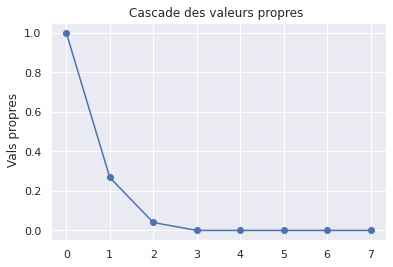

In [ ]:
# la cascade des valeurs propres
VP, VecP=A_Hyperplan(A,k=8)
n,m = MC.shape    
plt.plot(np.arange(m),sorted(VP, reverse=True),'o-')
plt.title("Cascade des valeurs propres ")
plt.ylabel(" Vals propres")
plt.show() 

D’après le graphe de la cascade des valeurs propres ainsi que le tableau des valeurs propres, on choisit les deux premières valeurs propres qui sont plus prépondérantes que le reste. Ensuite, on calcule les nouvelles coordonnées des individus dans le nouveau plan factoriel et on représente le tout.

On calcule les cordinnées factorielles qui égale à $\phi_{\alpha}={D^-1}_{n}F{D^-1}_{p}u_{\alpha}$

In [ ]:
def cordonne_nouveau(MF):

    n = MF.shape[0]
    p = MF.shape[1]
    diag_matrix_n = np.zeros((n, n))
    diag_matrix_p = np.zeros((p, p))
    
    vp, vectp = A_Hyperplan(MF, MF.shape[1])
    for i in range(0, n):
        diag_matrix_n[(i, i)] = np.sum(MF[i,:])
    for j in range(0, p):
        diag_matrix_p[(j, j)] = np.sum(MF[:,j])
    
    Dn = np.linalg.inv(diag_matrix_n)
    Dp = np.linalg.inv(diag_matrix_p)
    
    
    return np.linalg.multi_dot([ Dn, MF, Dp, vectp]),vp

In [ ]:
AFC,vp=cordonne_nouveau(A)

0


## Question3:  

Présentation des points dans l'espace réduit

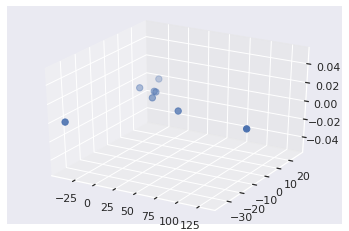

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(AFC[:,1],AFC[:,2],zdir='z',s=40,depthshade=True)
plt.show()

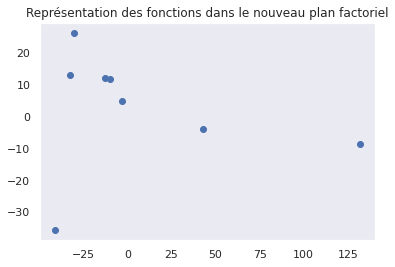

In [ ]:
noms = ["Non répondu","Homme","Femme"]
plt.scatter(AFC[:,1],AFC[:,2])
plt.grid()
plt.title("Représentation des fonctions dans le nouveau plan factoriel")
plt.show()

In [ ]:
# Les nouvelles coordonées dans l'espace factoriel réduit 


nouvelles_coord1 = np.sqrt(Dp).dot(VecP[0])
nouvelle_coord2 = np.sqrt(Dp).dot(VecP[1])

axe1 = M_freq.dot(nouvelles_coord1)
axe2 = -M_freq.dot(nouvelle_coord2)

nouvelles_coord = pd.DataFrame([axe1, axe2])
nouvelles_coord = np.transpose(nouvelles_coord)
nouvelles_coord.columns = ["Axe 1", "Axe 2"]

nouvelles_coord = nouvelles_coord.transpose()
nouvelles_coord.columns = ["Non répondu","Homme","Femme"]
nouvelles_coord = nouvelles_coord.transpose()


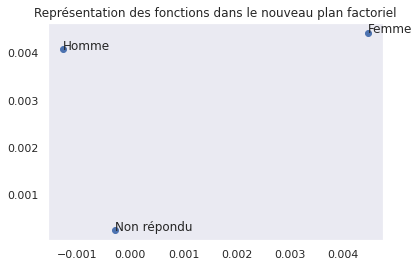

In [ ]:

# Visualisation du nuage dans l'espace factoriel réduit

noms = ["Non répondu","Homme","Femme"]
plt.scatter(nouvelles_coord.loc[:,"Axe 1"],nouvelles_coord.loc[:,"Axe 2"])
plt.grid()
plt.title("Représentation des fonctions dans le nouveau plan factoriel")
for i in range(3):
    plt.annotate(noms[i],(nouvelles_coord.loc[noms[i],"Axe 1"],nouvelles_coord.loc[noms[i],"Axe 2"]))
plt.show()

In [ ]:
nouvelles_coord

,Axe 1,Axe 2
Non répondu,-0.000297,0.000255
Homme,-0.001263,0.004069
Femme,0.004469,0.004421


## Question4: 

La qualité de projection

Après la diagonalisation et la détermination des valeurs et vecteurs propres, on calcul la qualité individuelle $ q_{i,k} = \frac{\sum_{j=1}^{k} (c_{j}^k)^2}{\sum_{j=1}^{p} (c_{j}^k)^2}$ pour les nouvelles cordonnées des variables. 

In [ ]:
def Qualite_matrix(M):
    Qualite_matrix = np.dot(np.multiply(M, M), np.triu(np.ones((M.shape[1],M.shape[1]))))  
    Qualite_matrix = np.multiply(Qualite_matrix, np.divide(1.0, Qualite_matrix[:,-1:]))   
    return Qualite_matrix

In [ ]:
pd.DataFrame(Qualite_matrix(nouvelles_coord))


,0,1
0,0.576058,1.0
1,0.087924,1.0
2,0.505423,1.0


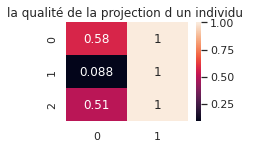

In [ ]:
fig = plt.figure( )
ax1 = fig.add_subplot(221)
sns.heatmap(pd.DataFrame(Qualite_matrix(nouvelles_coord)),ax = ax1,annot=True).set_title('la qualité de la projection d un individu ')
plt.show()

On en conclut que la qualité de projection est moyennement bonne car le nombre d’individus est plutôt faible

#### l’AFC sur l’espace de Rn.

On reprend la même méthode et les mêmes calculs que dans l’AFC sur Rp, la seule différence étant dans la matrice à diagonaliser : T = F*Dp-1*F'*Dn-1


Encore une fois, on voit que cette matrice est réelle mais pas symétrique. On reprend la même approche que tout à l’heure, quitte à invertir les rôles de F et F’ d’une part, et  et  d’autre part.

In [ ]:
M_chapeau = M_freq.dot(np.linalg.inv(Dp).dot(np.transpose(M_freq)))
M =np.sqrt(np.linalg.inv(Dn)).dot(M_chapeau.dot(np.sqrt(np.linalg.inv(Dn))))
M

array([[7.05934054e-06, 2.89462033e-06, 1.46862921e-06],
       [2.89462033e-06, 9.82150991e-06, 5.80895562e-06],
       [1.46862921e-06, 5.80895562e-06, 9.24050847e-06]])

In [ ]:
AFCN,vpN=A_Hyperplan(np.transpose(M))

0


0


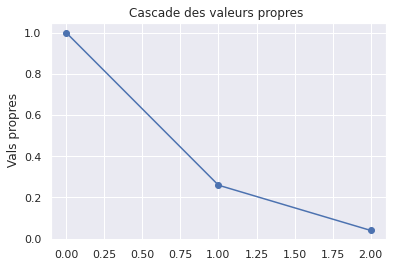

In [ ]:
# la cascade des valeurs propres
VP, VecP=A_Hyperplan(np.transpose(M),k=8)
n,m = np.transpose(M).shape    
plt.plot(np.arange(m),sorted(VP, reverse=True),'o-')
plt.title("Cascade des valeurs propres ")
plt.ylabel(" Vals propres")
plt.show() 

In [ ]:
# On prend les deux premiers vecteurs propres comme axes factoriels, les autres 
# ont des valeurs propres correspondantes nulles si on arrondit à 3 chiffre après la virgule

# Les nouvelles coordonées dans l'espace factoriel réduit 

nouvelles_coord3 = np.sqrt(Dn).dot(vpN[0])
nouvelles_coord4 = np.sqrt(Dn).dot(vpN[1])

axe3 = np.transpose(M_freq).dot(nouvelles_coord3)
axe4 = -np.transpose(M_freq).dot(nouvelles_coord4)

nouvelles_coord2 = pd.DataFrame([axe3, axe4])
nouvelles_coord2 = np.transpose(nouvelles_coord2)
nouvelles_coord2.columns = ["Axe 1", "Axe 2"]



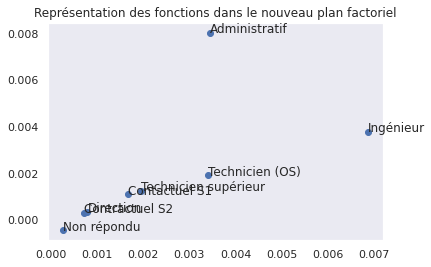

In [ ]:
# Visualisation du nuage dans l'espace factoriel réduit

noms2 = ["Non répondu","Administratif","Technicien (OS)","Ingénieur","Technicien supérieur", "Direction", "Contactuel S1", "Contractuel S2"]
plt.scatter(nouvelles_coord2.loc[:,"Axe 1"],nouvelles_coord2.loc[:,"Axe 2"])
plt.grid()
plt.title("Représentation des fonctions dans le nouveau plan factoriel")
for i in range(8):
  plt.text(nouvelles_coord2.loc[:,"Axe 1"][i],nouvelles_coord2.loc[:,"Axe 2"][i],noms2[i])
plt.show()

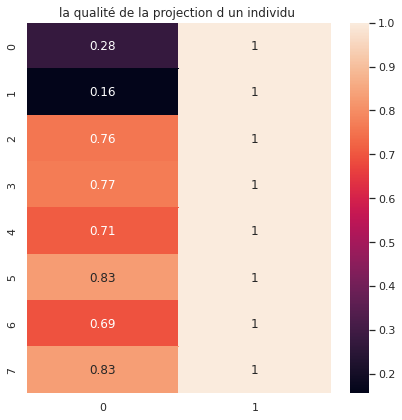

In [ ]:
fig = plt.figure(figsize= (15, 15))
ax1 = fig.add_subplot(221)
sns.heatmap(Qualite_matrix(nouvelles_coord2).real,ax = ax1,annot=True).set_title('la qualité de la projection d un individu ')
plt.show()

La qualité de projection est très élevée pour toutes les fonctions sauf la première qui correspond à « Non répondu ». On peut conclure que l’AFC dans l’espace  se fait sans perte d’information.


## Question5: 

In [ ]:
pip install fanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
from fanalysis.ca import CA
afc = CA(row_labels=MC.index,col_labels=MC.columns) 
afc.fit(MC.values)

CA(col_labels=RangeIndex(start=0, stop=8, step=1),
   row_labels=RangeIndex(start=0, stop=3, step=1))

In [ ]:
print(pd.DataFrame(afc.row_coord_))

          0         1
0 -1.748434  0.445119
1  0.002676 -0.461658
2  0.433844  0.451943


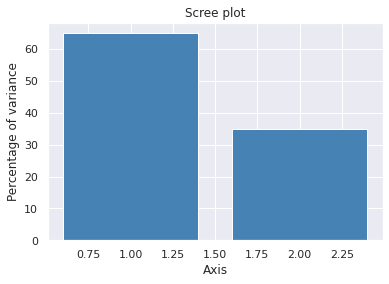

In [ ]:
afc.plot_eigenvalues(type="percentage")

Nous représentons les lignes des individus dans le premier plan factoriel qui restitue 6% de l'information disponible.

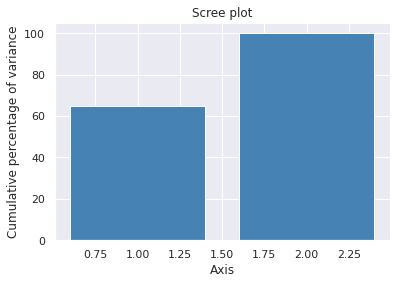

In [ ]:
afc.plot_eigenvalues(type="cumulative")


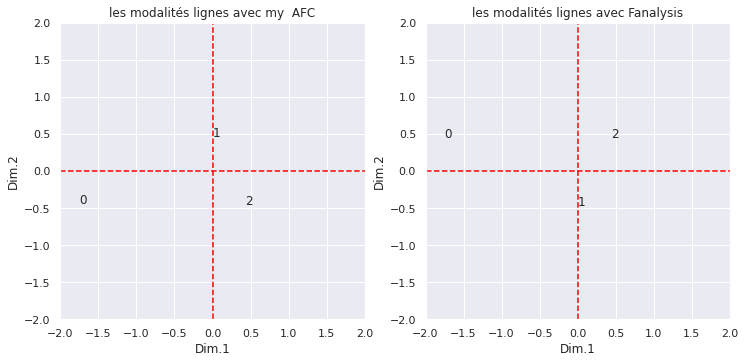

In [ ]:
fig = plt.figure(figsize= (12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.axis([-2,+2,-2,+2])
ax1.plot([-2,+2],[0,0],color='red',linestyle='--') 
ax1.plot([0,0],[-2,+2],color='red',linestyle='--') 
ax1.set_xlabel("Dim.1")
ax1.set_ylabel("Dim.2")
ax1.set_title('les modalités lignes avec my  AFC', fontsize=12)


for i in range(M_freq.shape[0]):
    ax1.text(AFC[i,1],AFC[i,2],pd.DataFrame(M_freq).index[i]) 
    
ax2.axis([-2,+2,-2,+2])
ax2.plot([-2,+2],[0,0],color='red',linestyle='--') 
ax2.plot([0,0],[-2,+2],color='red',linestyle='--') 
ax2.set_xlabel("Dim.1")
ax2.set_ylabel("Dim.2")
ax2.set_title('les modalités lignes avec Fanalysis', fontsize=12)

for i in range(M_freq.shape[0]):
    ax2.text(afc.row_coord_[i,0],afc.row_coord_[i,1],MC.index[i]) 

    
plt.show()

On remarque qu'on a une symétrie par rapport à l'axe de milieu entre les deux graphiques. 

En plaçant la même échelle en abscisse et en ordonnée, on voit que la différenciation des modalités de la ligne se joue presque exclusivement sur le premier axe factoriel

Calculons les distances euclidiennes dans le 1er plan.

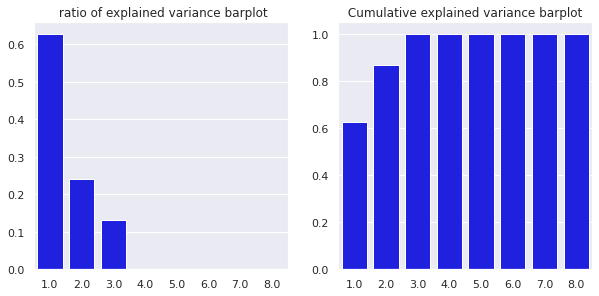

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)


sns.barplot(np.linspace(start=1, stop=8, num=8),
            vp/(sum(vp)),
            color = 'blue', 
            ax=ax1).set_title(' ratio of explained variance barplot')

sns.barplot(np.linspace(start=1, stop=8, num=8),
            np.cumsum(vp/(sum(vp))),
            color = 'blue', 
            ax=ax2).set_title(' Cumulative explained variance barplot ')

plt.show()

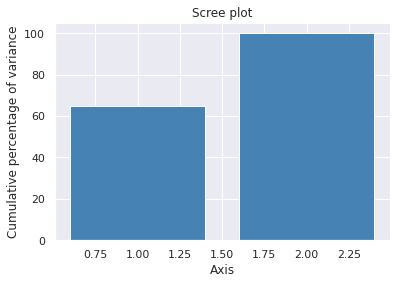

In [ ]:
afc.plot_eigenvalues(type="cumulative")

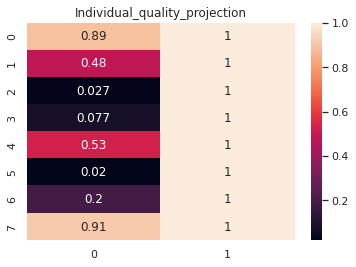

In [ ]:
sns.heatmap(Qualite_matrix(afc.col_coord_),annot=True).set_title('Individual_quality_projection')
plt.show()

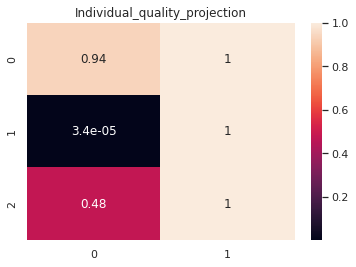

In [ ]:
sns.heatmap(Qualite_matrix(afc.row_coord_),annot=True).set_title('Individual_quality_projection')
plt.show()

In [ ]:
import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(MC)
st_chi2, st_p, st_dof

(146.6285826878836, 3.391029301261047e-24, 14)

2 types de graphiques peuvent être réalisés :

Les mapping classiques qui représentent les points lignes et colonnes sur un plan factoriel
Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui pr les plus fortes contributions et cos2 pour cet axe

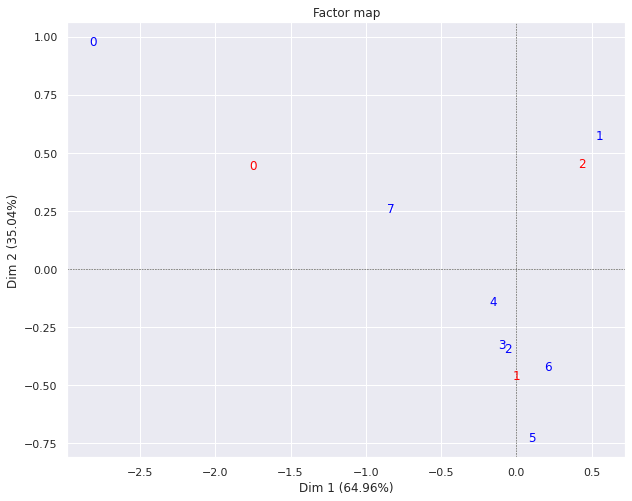

In [ ]:
afc.mapping(1, 2, figsize=(10, 8))

D’après la représentation graphique simultanée, on peut conclure que les hommes ont plus tendance à occuper les fonctions d’ingénieur ou technicien/technicien supérieur dans l’entreprise et que les femmes ont plus tendance à occuper les postes administratifs de l’entreprise.

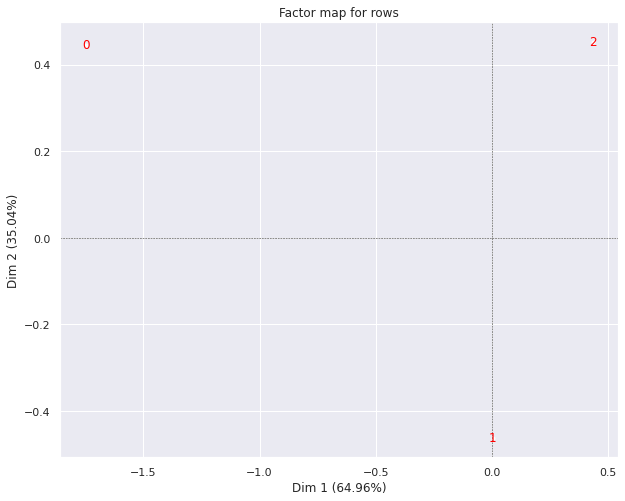

In [ ]:
# Mapping des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10, 8))

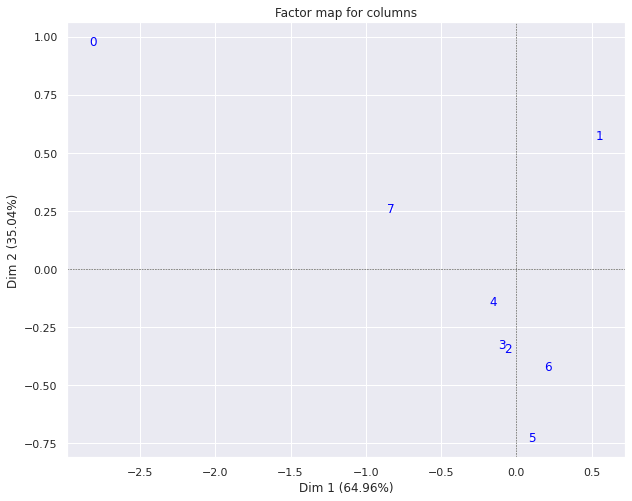

In [ ]:
# Mapping des points colonnes
afc.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

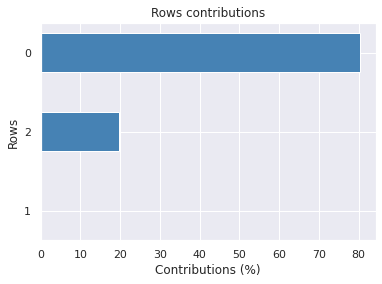

In [ ]:
# Classement des points lignes en fonction de leur contribution au 1er axe
afc.plot_row_contrib(num_axis=1)


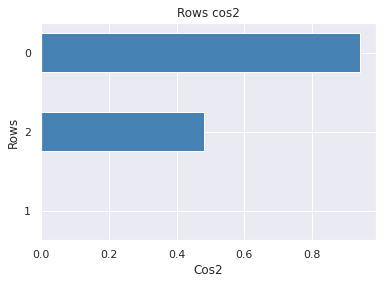

In [ ]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
afc.plot_row_cos2(num_axis=1)

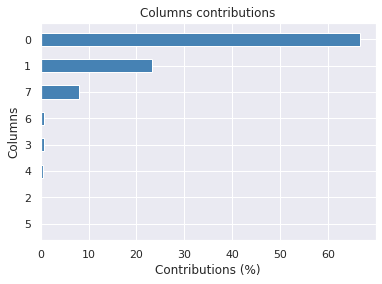

In [ ]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
afc.plot_col_contrib(num_axis=1)

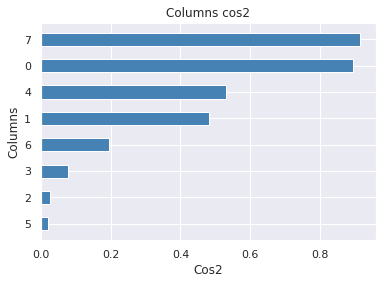

In [ ]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
afc.plot_col_cos2(num_axis=1)

Que l’analyse soit faite suivant la fonction occupée dans l’entreprise ou suivant le genre de l’employé, on conclut que l’entreprise fournit à ses employés un temps suffisant pour la réalisation de leurs tâches.